## Analyze Employee Exit Surveys
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Read data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read csv files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# check the file
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.isnull().sum() /dete_survey.shape[0]*100

ID                                      0.000000
SeparationType                          0.000000
Cease Date                              0.000000
DETE Start Date                         0.000000
Role Start Date                         0.000000
Position                                0.608273
Classification                         44.647202
Region                                  0.000000
Business Unit                          84.671533
Employment Status                       0.608273
Career move to public sector            0.000000
Career move to private sector           0.000000
Interpersonal conflicts                 0.000000
Job dissatisfaction                     0.000000
Dissatisfaction with the department     0.000000
Physical work environment               0.000000
Lack of recognition                     0.000000
Lack of job security                    0.000000
Work location                           0.000000
Employment conditions                   0.000000
Maternity/family    

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey['DETE Start Date'].value_counts(dropna=False)

DETE Start Date
Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1970          21
2013          21
1975          21
2005          20
1990          20
1996          19
1999          19
2000          18
1992          18
2004          18
1991          18
1989          17
1976          15
2002          15
1978          15
2003          15
1988          15
1974          14
1980          14
1995          14
1998          14
1997          14
1979          14
1993          13
1986          12
1972          12
1977          11
1971          10
2001          10
1984          10
1969          10
1994          10
1981           9
1983           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: count, dtype: int64

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.isnull().sum() / tafe_survey.shape[0]

Record ID                                                                    0.000000
Institute                                                                    0.000000
WorkArea                                                                     0.000000
CESSATION YEAR                                                               0.009972
Reason for ceasing employment                                                0.001425
                                                                               ...   
CurrentAge. Current Age                                                      0.150997
Employment Type. Employment Type                                             0.150997
Classification. Classification                                               0.150997
LengthofServiceOverall. Overall Length of Service at Institute (in years)    0.150997
LengthofServiceCurrent. Length of Service at current workplace (in years)    0.150997
Length: 72, dtype: float64

* TAFE survey has long column names, needs to be shortened. The reason for ceasing exployment should make consistent.

* DETE survery several columns with lots of nulls can be dropped.


## Identify the missing values

In [8]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [9]:
dete_survey['DETE Start Date'].value_counts().sort_index()

DETE Start Date
1963.0     4
1965.0     1
1966.0     1
1967.0     2
1968.0     3
1969.0    10
1970.0    21
1971.0    10
1972.0    12
1973.0     8
1974.0    14
1975.0    21
1976.0    15
1977.0    11
1978.0    15
1979.0    14
1980.0    14
1981.0     9
1982.0     4
1983.0     9
1984.0    10
1985.0     8
1986.0    12
1987.0     7
1988.0    15
1989.0    17
1990.0    20
1991.0    18
1992.0    18
1993.0    13
1994.0    10
1995.0    14
1996.0    19
1997.0    14
1998.0    14
1999.0    19
2000.0    18
2001.0    10
2002.0    15
2003.0    15
2004.0    18
2005.0    20
2006.0    23
2007.0    34
2008.0    31
2009.0    24
2010.0    27
2011.0    40
2012.0    27
2013.0    21
Name: count, dtype: int64

In [10]:
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Make the not stated as NaN. Some coloumns are not needed for the analysis. Therefore, they are deleted.

## Clean Column Names

In [12]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
tafe_columns_rename = {'Record ID': 'id', 'CESSATION YEAR':'cease_date',
                      'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?':'gender',
                      'CurrentAge. Current Age':'age', 'Employment Type. Employment Type': 'employment_status',
                      'Classification. Classification':'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                      'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service' 
        }
tafe_survey_updated = tafe_survey_updated.rename(tafe_columns_rename, axis=1)

In [15]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Change the columns in dete_survey_updated into lowercase, replace space with underscore line.
Tafe_columns, rename the column names to be consistent with that in dete_survey_updated

## Filter the data

In [16]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [17]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [18]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r'Resignation')].copy()


In [19]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains(r'Resignation', na=False)].copy()

Filter the separation columns with Resignation

## Verify the data
Check the data to make sure it makes sense, e.g. cease date should be later than the start date

In [20]:
# cease_date
dete_resignations['cease_date'].value_counts(dropna=False)

# Extract the year
filter_year = r"([1-2][0-9]{3})"
dete_resignations['cease_year'] = dete_resignations['cease_date'].str.extract(filter_year).astype(float)

dete_resignations['cease_year'].value_counts().sort_index()

cease_year
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: count, dtype: int64

In [21]:
dete_resignations['dete_start_date'].value_counts().sort_index()

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

In [22]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: count, dtype: int64

dete start date ranges from 1963 to 2013, and the cease date is between 2006 and 2014. For TAFE, the cease year ranges from 2009 to 2013.

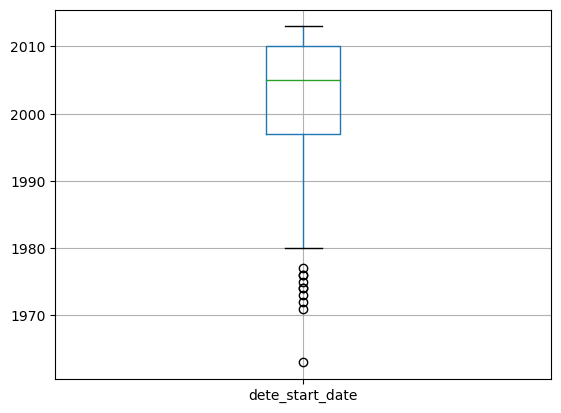

In [23]:
dete_resignations.boxplot(column='dete_start_date')
plt.show()

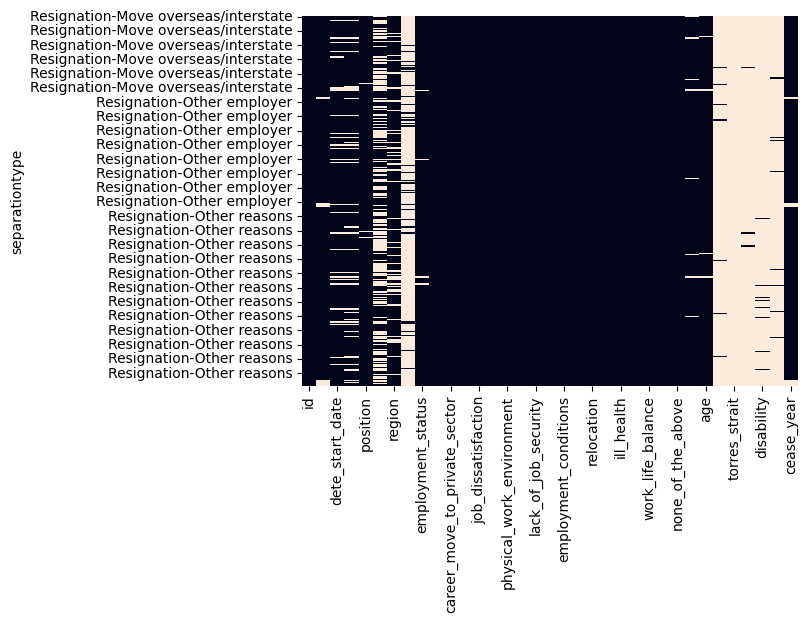

In [24]:
copy = dete_resignations.set_index('separationtype').sort_values(['separationtype', 'cease_year'])
sns.heatmap(copy.isnull(), cbar=False)
plt.show()

In [25]:
dete_resignations[['dete_start_date', 'cease_year']].value_counts(dropna=False).sort_index()

dete_start_date  cease_year
1963.0           2012.0         1
1971.0           2013.0         1
1972.0           2013.0         1
1973.0           2012.0         1
1974.0           2012.0         1
                               ..
2012.0           NaN            1
2013.0           2013.0        10
NaN              2012.0        14
                 2013.0        13
                 NaN            1
Name: count, Length: 97, dtype: int64

## Create a new columns

In [26]:
tafe_resignations['institute_service']

3       NaN
4       3-4
5      7-10
6       3-4
7       3-4
       ... 
696     5-6
697     1-2
698     NaN
699     5-6
701     3-4
Name: institute_service, Length: 340, dtype: object

In [27]:
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype(float)
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']
dete_resignations[['institute_service', 'dete_start_date', 'cease_year']]

,institute_service,dete_start_date,cease_year
3,7.0,2005.0,2012.0
5,18.0,1994.0,2012.0
8,3.0,2009.0,2012.0
9,15.0,1997.0,2012.0
11,3.0,2009.0,2012.0
...,...,...,...
808,3.0,2010.0,2013.0
815,2.0,2012.0,2014.0
816,2.0,2012.0,2014.0
819,5.0,2009.0,2014.0


In [28]:
dete_resignations['institute_service'].isnull().sum()

38

In [29]:
def new_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val < 1:
        return 'Less than 1 year'
    elif val <= 2:
        return '1-2'
    elif val <= 4:
        return '2-4'
    elif val <= 6:
        return '4-6'
    elif val <= 10:
        return '7-10'
    else:
        return '11-20'
#apply function
dete_resignations['institute_service'] = dete_resignations['institute_service'].apply(new_vals)

#check for success
dete_resignations['institute_service'].value_counts(dropna=False)

institute_service
11-20               100
7-10                 41
4-6                  40
NaN                  38
2-4                  36
1-2                  36
Less than 1 year     20
Name: count, dtype: int64

Calculate the year for institute service in dete_resignations

## Identify Dissatisfied Employees

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [32]:
# create a function for assigning True False and np.nan
def update_vals(element):
    if element == '-':
        return False
    elif pd.isnull(element):
        return np.nan
    else:
        return True

In [33]:
# Convert tafe dissatification related columns into 
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [34]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
False    277
True      55
NaN        8
Name: count, dtype: int64

In [35]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
False    270
True      62
NaN        8
Name: count, dtype: int64

In [36]:
### tafe dissatisfied
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

tafe_resignations['dissatisfied'].value_counts(dropna=False)/ tafe_resignations['dissatisfied'].size * 100

dissatisfied
False    70.882353
True     29.117647
Name: count, dtype: float64

In Tafe, 29% of the employees left the job beacuse of dissatisfication

In [37]:
### dete dissatisfied
dete_factors_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions','work_life_balance', 'workload']


In [38]:
dete_resignations[dete_factors_columns].apply(pd.value_counts, dropna=False)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
False,270,282,305,278,297,293,288,243,284
True,41,29,6,33,14,18,23,68,27


In [39]:
dete_resignations['dissatisfied'] = dete_resignations[dete_factors_columns].any(axis=1, skipna=False)

dete_resignations['dissatisfied'].value_counts() / dete_resignations['dissatisfied'].size * 100

dissatisfied
False    52.090032
True     47.909968
Name: count, dtype: float64

In [40]:
dete_resignations.value_counts()

Series([], Name: count, dtype: int64)

In Dete, 47.9% peopel quitted the drop because of dissatification.

In [41]:
### Create a copy 
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [42]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      99
Name: count, dtype: int64

Covert the values in the columns related with disstatification to True, False, NaN

## Combine the Data

In [43]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [44]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined.columns
print(combined.shape)

(651, 54)


In [45]:
combined.dissatisfied.value_counts(dropna=False)

dissatisfied
False    403
True     248
Name: count, dtype: int64

In [46]:
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7-10,False,DETE
5,6.0,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,11-20,True,DETE
8,9.0,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,2-4,False,DETE
9,10.0,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,11-20,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,2-4,False,DETE


## Clean the Service Column

In [47]:
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [48]:
def new_val2(val):
    if pd.isnull(val):
        return np.nan
    elif (val == 'Less than 1 year') |  (val == '1-2'):
        return 'New'
    elif (val == '3-4') | (val == '4-6'):
        return 'Experienced'
    elif val == '7-10':
        return 'Established'
    else:
        return 'Veteran'
    

In [49]:
combined['service_cat'] = combined['institute_service'].apply(new_val2)
combined['service_cat'] .value_counts()

service_cat
Veteran        205
New            193
Experienced    103
Established     62
Name: count, dtype: int64

In [50]:
regex = r'(?P<Year1>[0-4][0-9])?(?P<Year2>[1-9])?(?P<Year3>[1-9]-[1-9])?'
tafe_resignations_up['institute_service'].str.extract(regex)
years = combined['institute_service'].str.extractall(regex)
years['Year2'].value_counts()

Year2
1    193
4    139
2    136
6     73
3     63
7     62
5     33
Name: count, dtype: int64

In [51]:
pivot_table = combined.pivot_table(values='dissatisfied', index='service_cat', aggfunc=np.mean, margins=True)

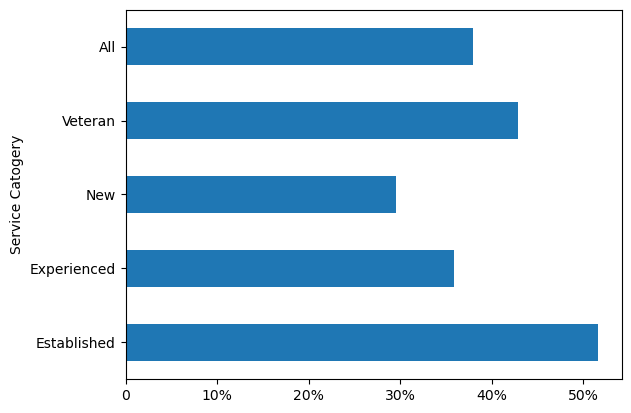

In [56]:
%matplotlib inline
pivot_table.plot(kind='barh', legend=False)
plt.ylabel('Service Catogery')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5],
          labels=['0' , '10%', '20%', '30%', '40%', '50%'])

plt.show()

### Age

In [53]:
combined['age'] = combined.age.str.replace('\s+', ' ').str.replace(' ', '-')
combined['age'].value_counts()
# regex = r'([0-9])-?([0-9])'
# age.str.extractall(regex)

age
51-55            71
41-45            48
41--45           45
46-50            42
36-40            41
46--50           39
26-30            35
21--25           33
36--40           32
31--35           32
26--30           32
21-25            29
56-or-older      29
31-35            29
56-60            26
61-or-older      23
20-or-younger    10
Name: count, dtype: int64

In [54]:
age_pivot = combined.pivot_table(values='dissatisfied', index='age', aggfunc=np.mean, margins=True)
age_pivot

,dissatisfied
age,
20-or-younger,0.200000
21--25,0.303030
21-25,0.310345
26--30,0.250000
26-30,0.571429
31--35,0.218750
31-35,0.551724
36--40,0.281250
36-40,0.390244


<Axes: ylabel='age'>

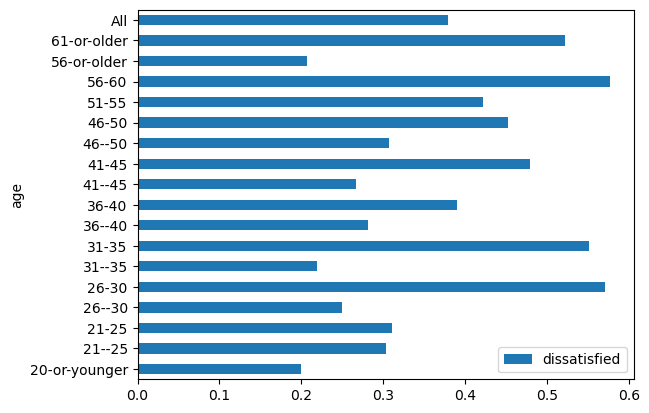

In [55]:
age_pivot.plot.barh()

## Conclusions

Older people with longer service years are mostly likely to cite dissatisfication for resigning. 